# PricePredictor Notes

Notes taken in thinking about a project to predict electricity prices for the coming 7 days or so.

## Inputs

 - Demand
     - Weather
     - Temperature
     - Day of week (and holiday etc.)
     - Time of day
 - Solar
     - Time of day
     - Time of year
     - Weather
 - Wind
     - Weather
 - Despatachable power
     - Gas price


## Solar Prediction

Sheffield Solar is the king of Solar data. They offer a prediction service, but it is just 72 hours and requires subscription. NG also offer a 24 hour prediction, which Sheffield reliably show is worse than theirs.

The complexity and distribution of solar makes me feel that the only reasonable approach is to use ML, trained on historic generation and historic weather and season data, as a way of predicting future performance.

__If we are doing this, would it be better to just do this directly on price??__

Historic Solar data can be got from Sheffield Solar, as below:


https://api0.solar.sheffield.ac.uk/pvlive/v2/?regionid=0&start=2017-12-01T07:00:00&end=2017-12-01T17:00:00


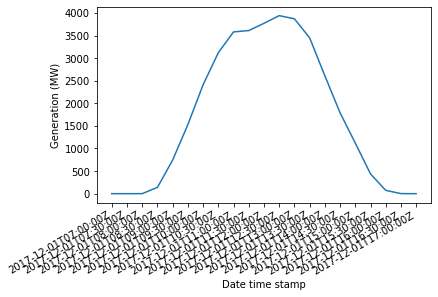

In [35]:
# Used to import Sheffield Solar data
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates

RegionID = str(0) # 0 is whole country there are 327 regions, based around NG substattions
Start = "2017-12-01T07:00:00"
End = "2017-12-01T17:00:00"
endpoint = "https://api0.solar.sheffield.ac.uk/pvlive/v2/?regionid="+RegionID+"&start="+Start+"&end="+End
response = requests.get(endpoint)
print(endpoint)

dt=[]
gen=[]
for item in response.json()['data']:
    dt.append(item[1])
    gen.append(item[2])

SolarGen={'dt':dt,'Generation':gen}

# print(SolarGen)
fig=plt.figure()
plt.plot(SolarGen['dt'],SolarGen['Generation'])
plt.ylabel("Generation (MW)")
plt.xlabel("Date time stamp")
fig.autofmt_xdate()

The next question is where we could get weather forecast data from. Ideally we'd use the same data source for historic forecasts and current forecasts, so we're not biasing our data.

An advanced method, might get local forecast for each of the 327 regions, but this might not be necessary. Forecasts for multiple regions are necessary I would think, but with an ML approach we don't necessarily have to match up the forecast with each region.


